Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7825 - loss: 0.6553 - val_accuracy: 0.9822 - val_loss: 0.0548
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9703 - loss: 0.1006 - val_accuracy: 0.9838 - val_loss: 0.0530
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9782 - loss: 0.0743 - val_accuracy: 0.9902 - val_loss: 0.0331
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9834 - loss: 0.0554 - val_accuracy: 0.9902 - val_loss: 0.0343
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9841 - loss: 0.0492 - val_accuracy: 0.9914 - val_loss: 0.0312
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9853 - loss: 0.0453 - val_accuracy: 0.9918 - val_loss: 0.0301
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9920 - val_loss: 0.0286
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9893 - loss: 0.0349 - val_accuracy: 

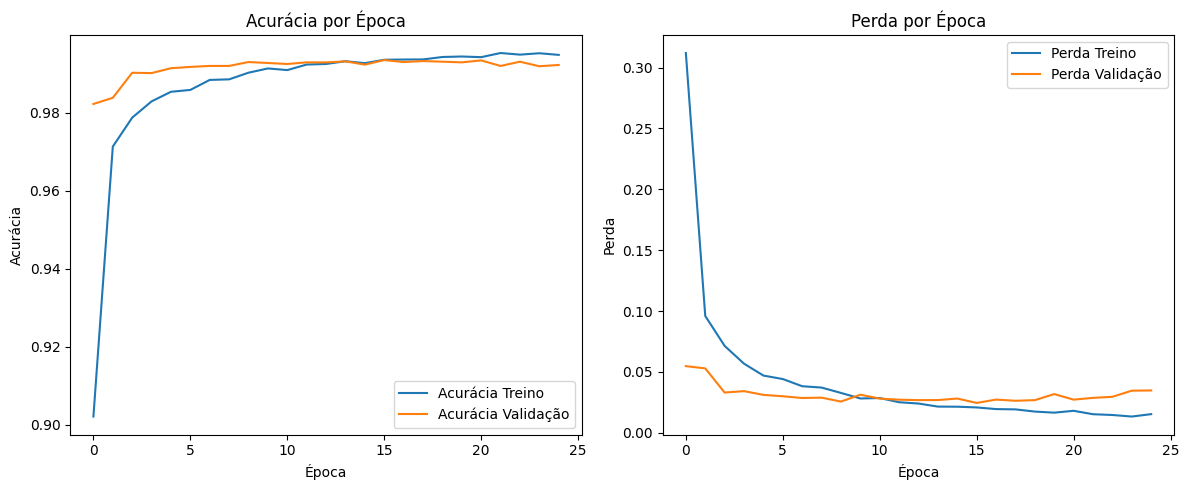

Formato dos filtros: (3, 3, 1, 32)


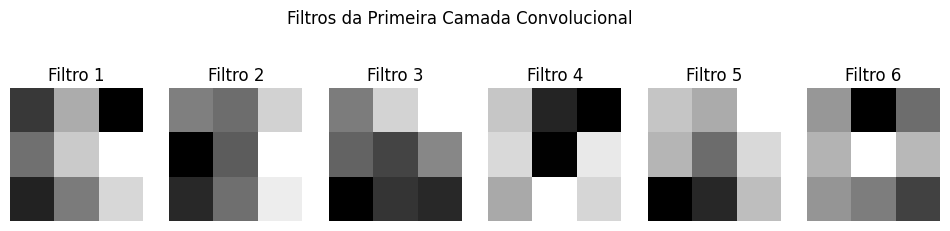

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Carregar os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pré-processamento
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definir a CNN otimizada
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.2)

# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# ------------------------------------
# Plotar as curvas de acurácia e perda
# ------------------------------------
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# Visualizar os filtros da primeira camada convolucional
# ---------------------------------------------------
# Obter os pesos da primeira camada Conv2D
filters, biases = model.layers[0].get_weights()

print(f"Formato dos filtros: {filters.shape}")  # Esperado: (3, 3, 1, 32) → 32 filtros 3x3

# Normalizar para exibir como imagem
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plotar os primeiros 6 filtros
n_filters = 6
plt.figure(figsize=(12, 3))
for i in range(n_filters):
    f = filters[:, :, 0, i]
    plt.subplot(1, n_filters, i + 1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title(f'Filtro {i+1}')
plt.suptitle('Filtros da Primeira Camada Convolucional')
plt.show()